# Detecting Anomalies in Tap Water Measurements

## Exploratory Data Analysis

The dataset will be working on is made of measurements made on a water distribution system in Germany. The data was collected from sensors on a minutely basis. Below are detailled the water quality indicators, and **<font color=#ff7400>any changes are considered as events (anomalies)</font>**.

But, it is important to note that the **<font color=#ff7400>flow rate and the temperature</font>** of the water are considered as operational data: **<font color=#ff7400>changes</font>** in these values may indicate variations in the related quality values but **<font color=#ff7400>are not considered as events themselves</font>**.

Here are more details about the dataset columns:

- Time: Time of measurement, given in following format: yyyy-mm-dd HH:MM:SS
- Tp: The temperature of the water, given in °C.
- Cl: Amount of chlorine dioxide in the water, given in mg/L (MS1)
- pH: PH value of the water
- Redox: Redox potential, given in mV
- Leit: Electric conductivity of the water, given in μS/cm
- Trueb: Turbidity of the water, given in NTU
- Cl_2: Amount of chlorine dioxide in the water, given in mg/L (MS2)
- Fm: Flow rate at water line 1, given in m3/h
- Fm_2: Flow rate at water line 2, given in m3/h
- EVENT: Marker if this entry should be considered as a remarkable change resp. event, given in boolean.

Dataset with more detailled information are available [here](https://www.spotseven.de/gecco/gecco-challenge/gecco-challenge-2018/).

### Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "../data/raw/waterDataTraining.csv"

df = pd.read_csv(data_path)

df.head(5)

,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT
0,2016-08-03T09:49:00Z,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1677.0,695.0,False
1,2016-08-03T09:50:00Z,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1561.0,696.0,False
2,2016-08-03T09:51:00Z,6.5,0.17,8.35,749.0,211.0,0.011,0.117,1581.0,696.0,False
3,2016-08-03T09:52:00Z,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1579.0,693.0,False
4,2016-08-03T09:53:00Z,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1567.0,689.0,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139566 entries, 0 to 139565
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    139566 non-null  object 
 1   Tp      138522 non-null  float64
 2   Cl      138521 non-null  float64
 3   pH      138522 non-null  float64
 4   Redox   138522 non-null  float64
 5   Leit    138522 non-null  float64
 6   Trueb   138522 non-null  float64
 7   Cl_2    138522 non-null  float64
 8   Fm      138522 non-null  float64
 9   Fm_2    138522 non-null  float64
 10  EVENT   139566 non-null  bool   
dtypes: bool(1), float64(9), object(1)
memory usage: 10.8+ MB


At first sight, it seems we have some null values, as some rows count are not equal to the total number of rows. Let's investigate further:

In [4]:
df.isnull().sum()

Time        0
Tp       1044
Cl       1045
pH       1044
Redox    1044
Leit     1044
Trueb    1044
Cl_2     1044
Fm       1044
Fm_2     1044
EVENT       0
dtype: int64

In [5]:
null_data = df[df.isnull().any(axis=1)]
nb_null_rows = null_data.shape[0]
total_rows = df.shape[0]
null_percentage = np.round((nb_null_rows / total_rows)*100, 2)

print(f"Data has {nb_null_rows} rows with null values out of {total_rows} total rows.")
print(f"This represents {null_percentage}% of our data.")

Data has 1045 rows with null values out of 139566 total rows.
This represents 0.75% of our data.


As we can see, missing data represents only 0.75% of our data. We can be rather confident that dropping those rows would have little to no impact.

But, for peace of mind, let's investigate a bit further:

In [6]:
null_data.head()

,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT
37152,2016-08-29T05:01:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37153,2016-08-29T05:02:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37154,2016-08-29T05:03:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37155,2016-08-29T05:04:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
37156,2016-08-29T05:05:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [7]:
null_data.tail()

,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT
126221,2016-10-30T01:30:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
126222,2016-10-30T01:31:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
126223,2016-10-30T01:32:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
126224,2016-10-30T01:33:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
126225,2016-10-30T01:34:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


It seems that when data is missing it is for most of the columns (actually all measurement features). Let's doubble check by using an **OR** operator:

In [8]:
null_data.columns

Index(['Time', 'Tp', 'Cl', 'pH', 'Redox', 'Leit', 'Trueb', 'Cl_2', 'Fm',
       'Fm_2', 'EVENT'],
      dtype='object')

In [9]:
null_data[(null_data['Tp'] > 0) | (null_data['Cl'] > 0) | (null_data['pH'] > 0) | (null_data['Redox'] > 0) | (null_data['Leit'] > 0)
        | (null_data['Trueb'] > 0) | (null_data['Cl_2'] > 0) | (null_data['Fm'] > 0) | (null_data['Fm_2'] > 0)]

,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT
38658,2016-08-30T06:07:00Z,7.4,NaN,8.39,751.0,214.0,0.02,0.113,1474.0,839.0,False


This confirms our intuition: as only one row is not affected by all measurements being null, this is probably a problem of corrupted data. There is nothing we can do, and as it represents only 0.7% of the data we will drop those rows.

### Features over time

In this section we will try to plot every features with "Time" as the x axis. It might help us to detect any trend in the data and maybe to build some intuitions of when are anomalies taking place.

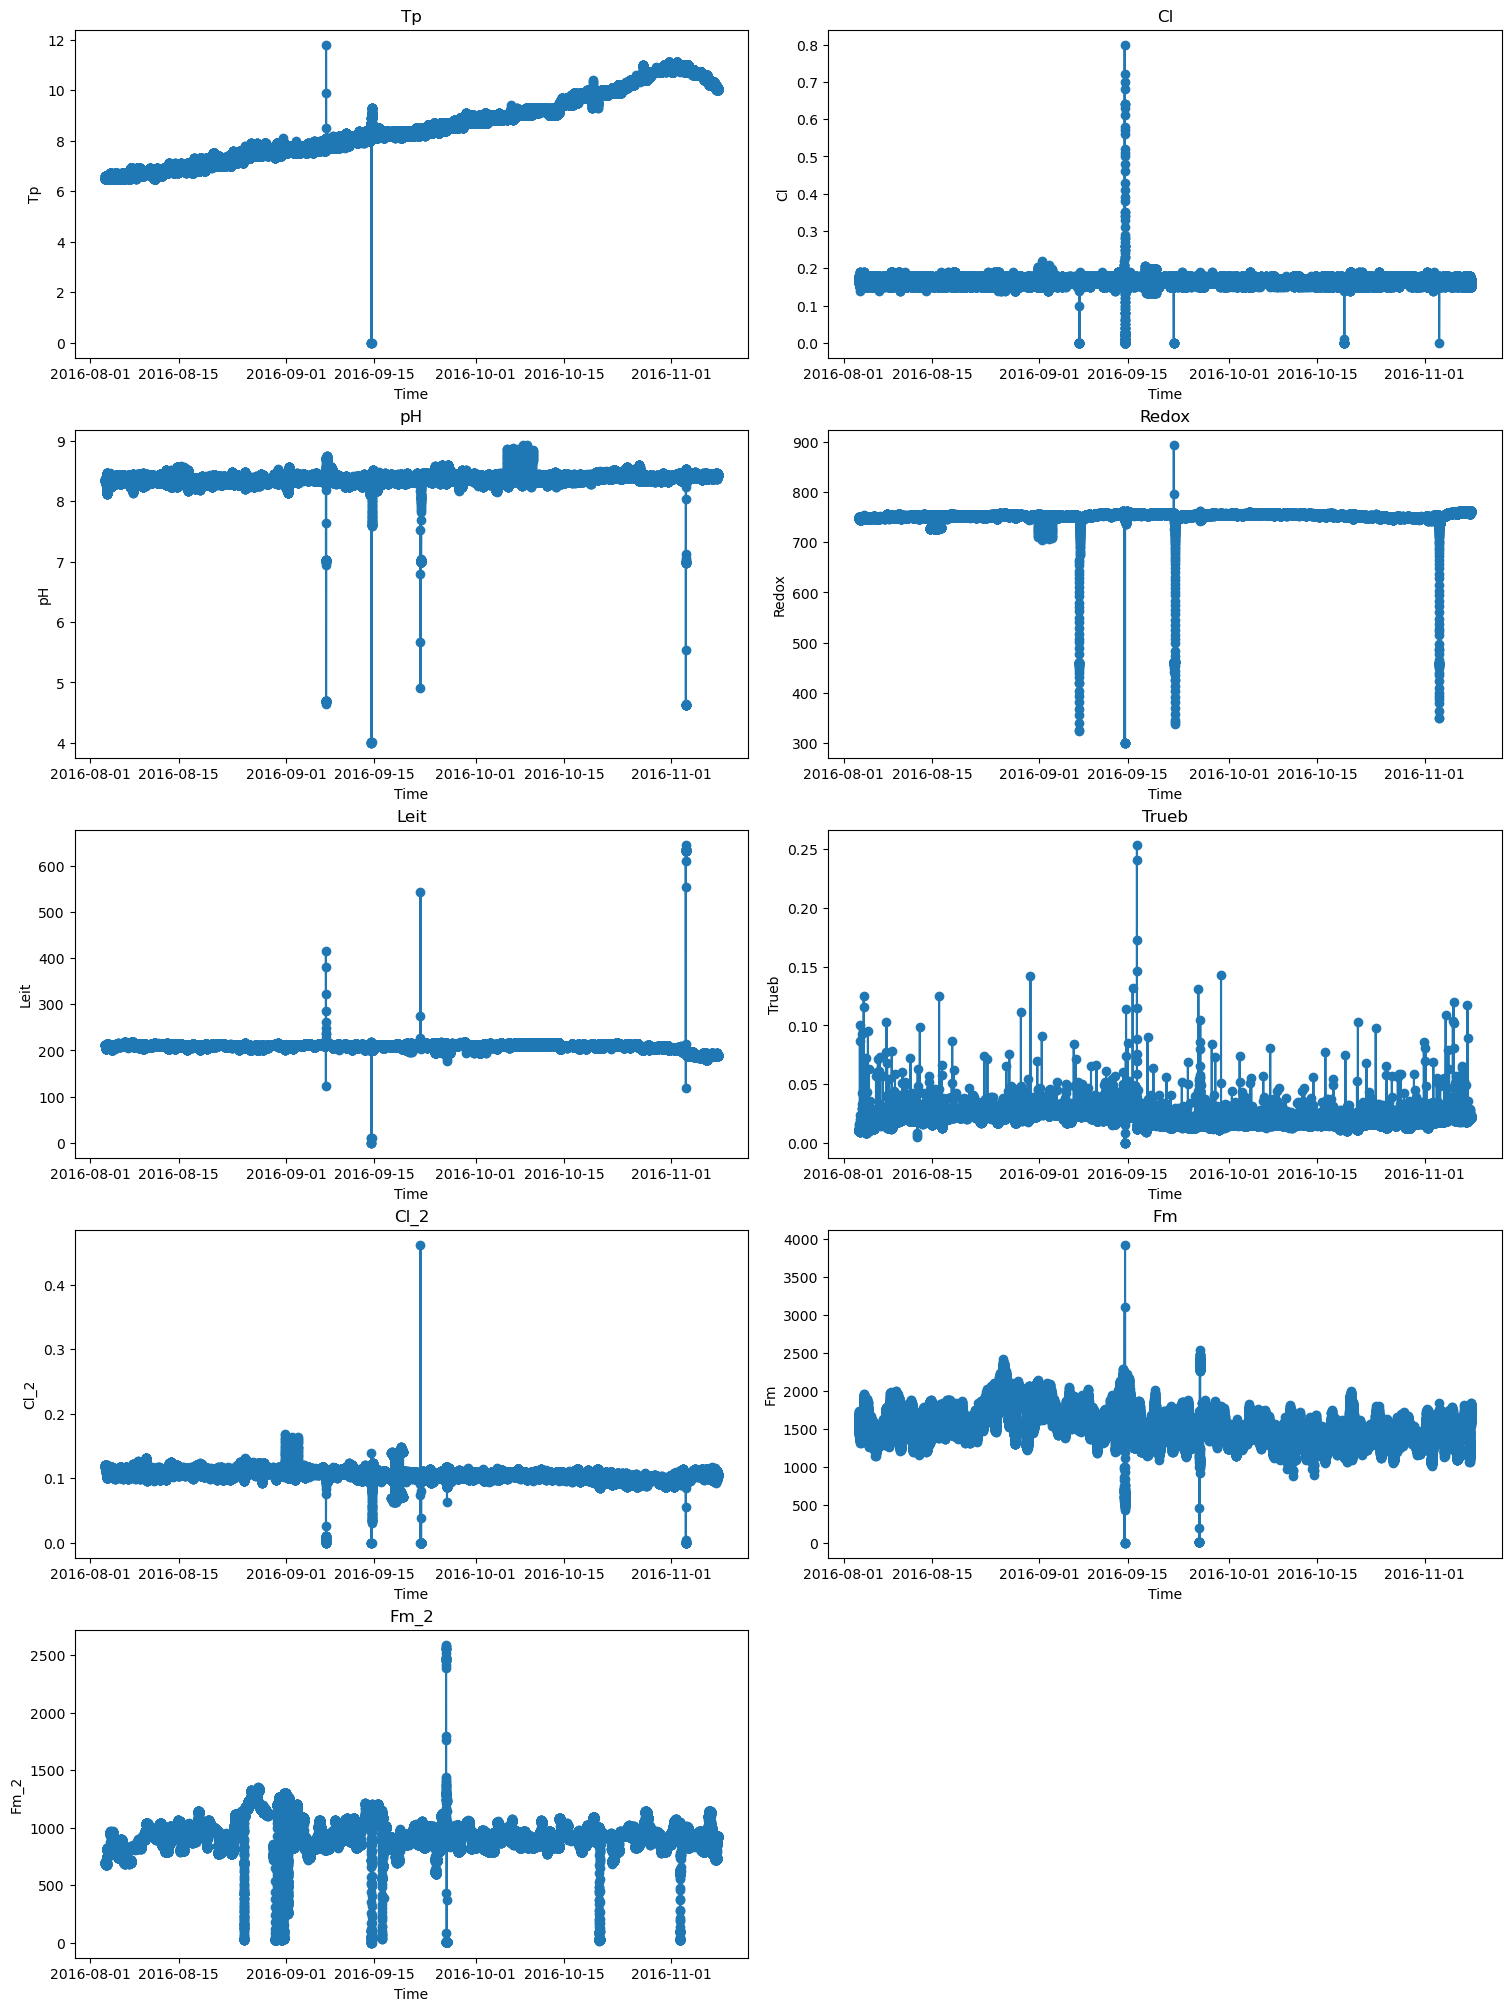

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

columns_to_plot = df.columns[1:-1]

n_cols = 2
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].plot(df['Time'], df[col], marker='o', linestyle='-')
    axes[i].set_title(col)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel(col)

for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.show()

As we can see, most of our features design straight lines over time. However, for some, we can observe values far from the rest of the data points. This is especially true for Temperature for example. However, as we stated at the beginning, Temperature and Flow Rate are not considered as good indicators for anomaly detection.

Therefore, we will focus on other features and plot them again, but this time by highlighting the anomalies.

In [11]:
df["EVENT"] = np.where(df["EVENT"] == False, 0, 1)
df.head()

,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT
0,2016-08-03 09:49:00+00:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1677.0,695.0,0
1,2016-08-03 09:50:00+00:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1561.0,696.0,0
2,2016-08-03 09:51:00+00:00,6.5,0.17,8.35,749.0,211.0,0.011,0.117,1581.0,696.0,0
3,2016-08-03 09:52:00+00:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1579.0,693.0,0
4,2016-08-03 09:53:00+00:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1567.0,689.0,0


In [12]:
anomalies = df.groupby(["EVENT"]).size()
nb_anomalies = anomalies[1]
anomalies_percentage = np.round((nb_anomalies / total_rows) * 100, 2)

print(f"Anomalies count: {nb_anomalies}. It represents {anomalies_percentage}% of the data.")

Anomalies count: 1726. It represents 1.24% of the data.


Already, we notice that we have just a few anomalies compared to the total number of rows. It makes sense of course as these are anomalies, but this might impact the capacity of our model to properly learn what an anomaly is.

In [13]:
columns_to_plot = list(df.columns)
to_remove = ["Time", "Tp", "Fm", "Fm_2", "EVENT"]

for col in to_remove:
    columns_to_plot.remove(col)

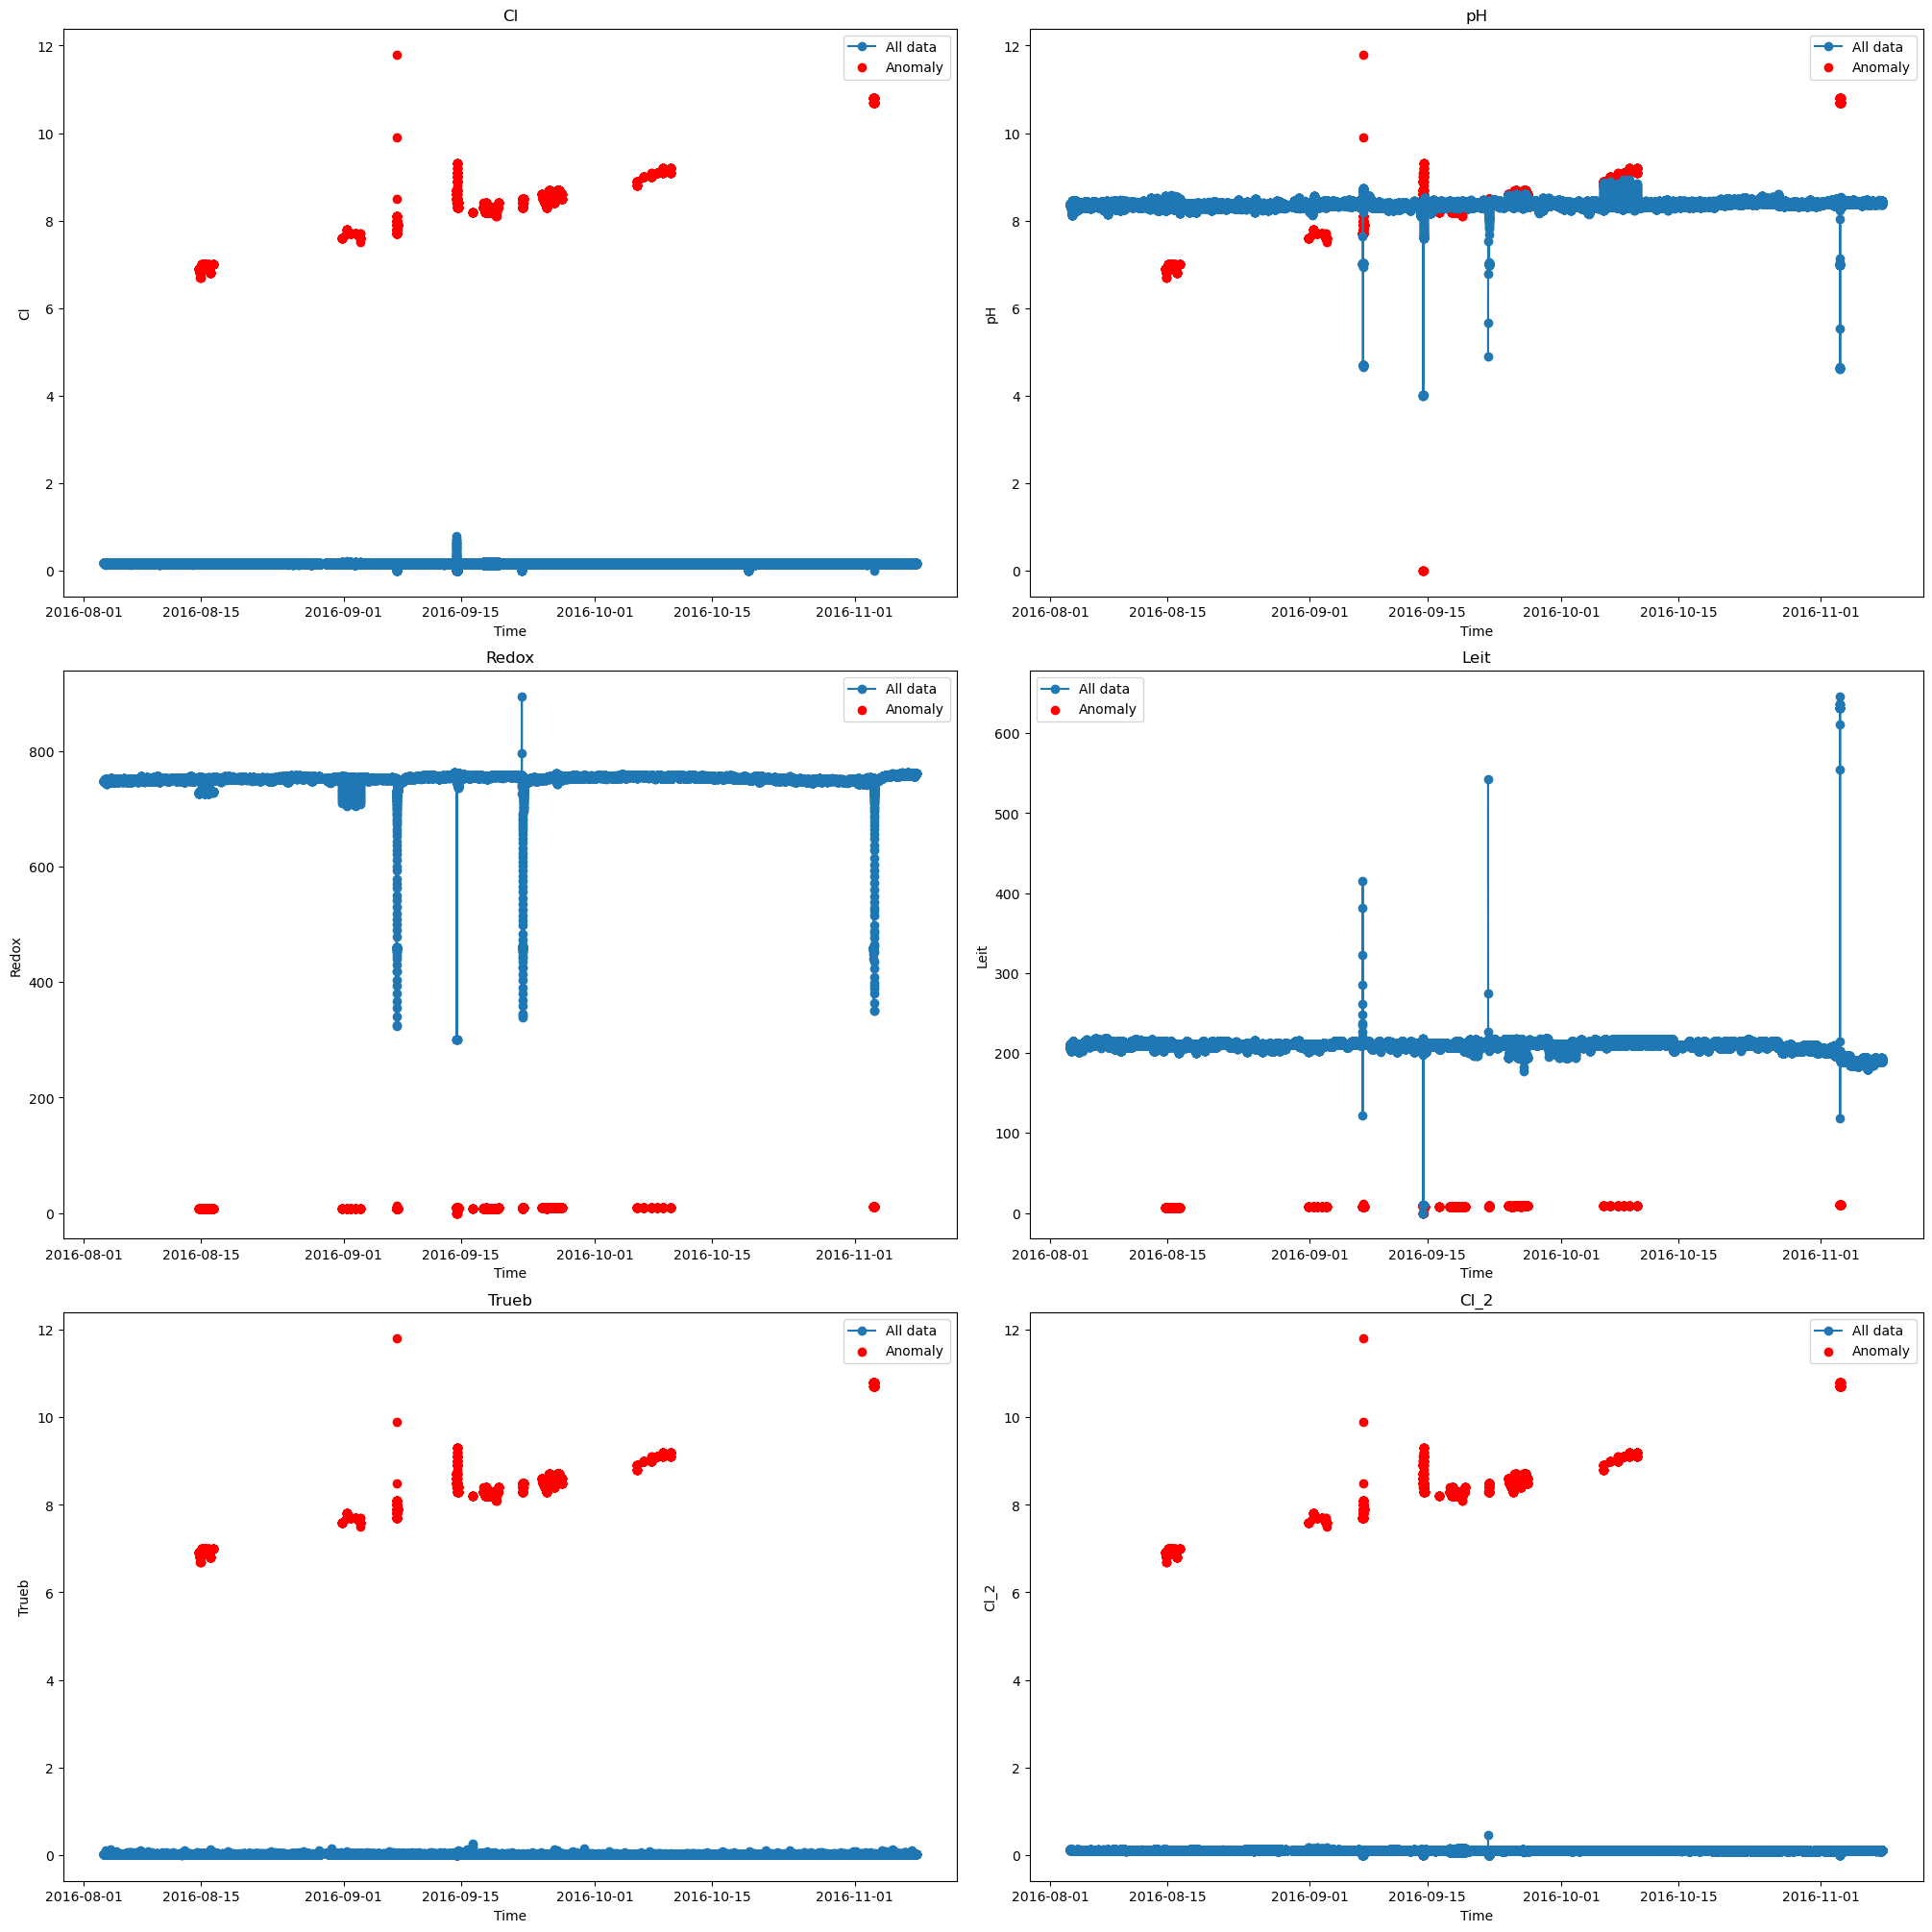

In [14]:
n_cols = 2
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols
anomalies = df[df['EVENT'] == 1]

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].plot(df['Time'], df[col], marker='o', linestyle='-', label='All data')
    axes[i].scatter(anomalies['Time'], anomalies['Tp'], color='red', label='Anomaly') # Highlighting points where EVENT == 1
    axes[i].set_title(col)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel(col)
    axes[i].legend()

for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.show()

With those graphs, it seems most of the anomalies are outliers. To be sure, we plotted below the features one by one, so we can have a better scale. After analysis, we can se that if some anomalies are real outliers, many of them are still "mixed in the crowd" and detecting them might not be that easy.

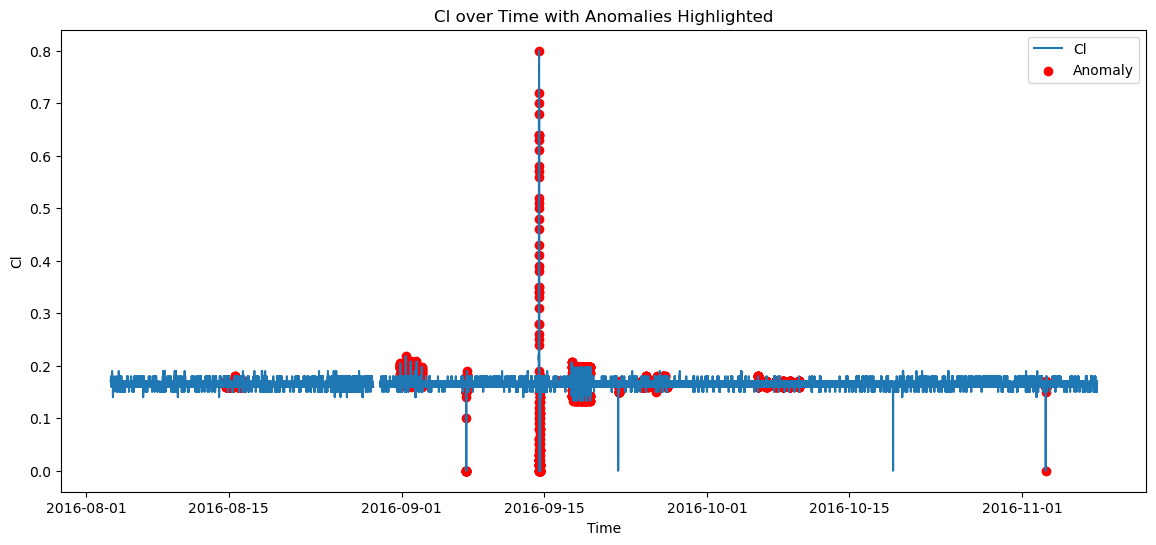

In [15]:
plt.figure(figsize=(14, 6))

plt.plot(df['Time'], df['Cl'], label='Cl')
plt.scatter(anomalies['Time'], anomalies['Cl'], color='red', label='Anomaly')

plt.title('Cl over Time with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('Cl')
plt.legend()

plt.show()

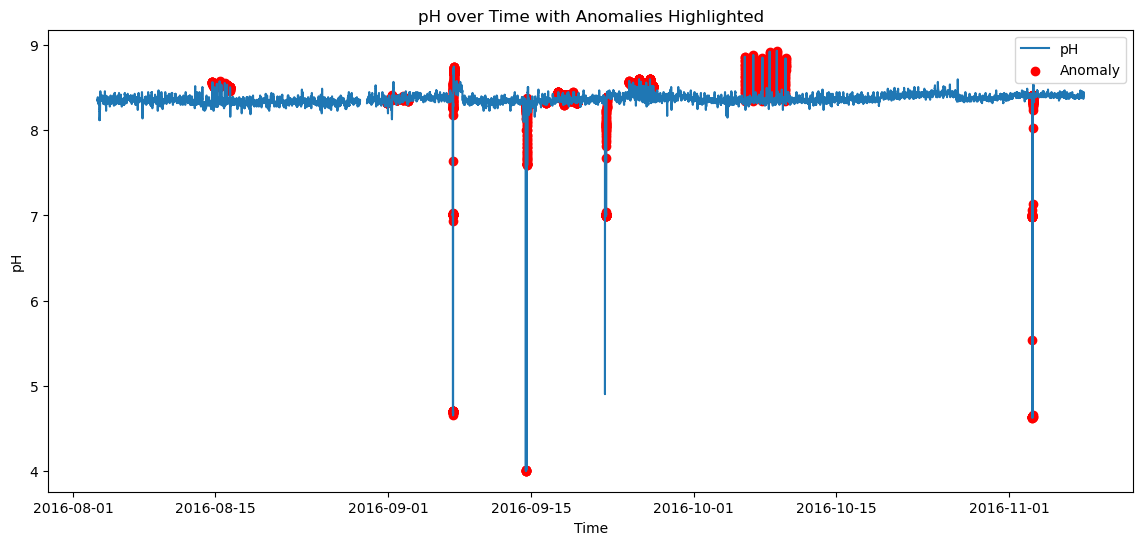

In [16]:
plt.figure(figsize=(14, 6))

plt.plot(df['Time'], df['pH'], label='pH')
plt.scatter(anomalies['Time'], anomalies['pH'], color='red', label='Anomaly')

plt.title('pH over Time with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('pH')
plt.legend()

plt.show()

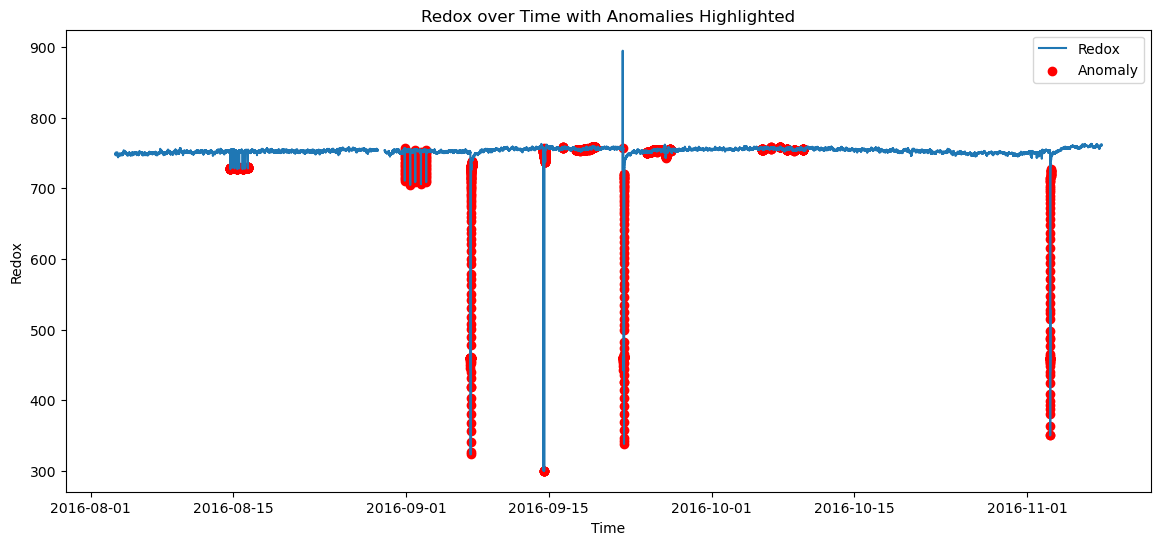

In [17]:
plt.figure(figsize=(14, 6))

plt.plot(df['Time'], df['Redox'], label='Redox')
plt.scatter(anomalies['Time'], anomalies['Redox'], color='red', label='Anomaly')

plt.title('Redox over Time with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('Redox')
plt.legend()

plt.show()

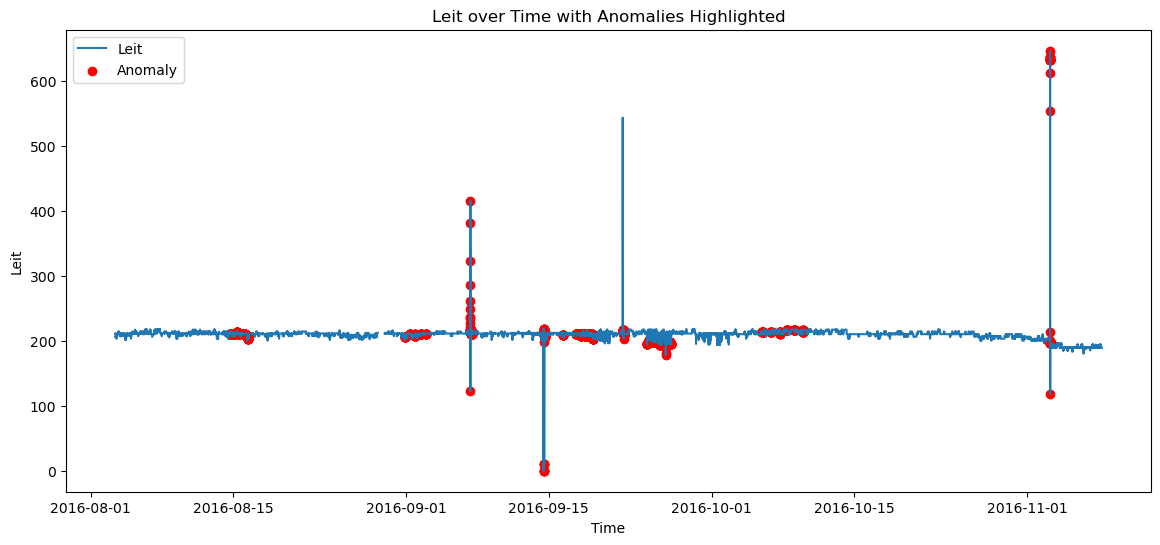

In [18]:
plt.figure(figsize=(14, 6))

plt.plot(df['Time'], df['Leit'], label='Leit')
plt.scatter(anomalies['Time'], anomalies['Leit'], color='red', label='Anomaly')

plt.title('Leit over Time with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('Leit')
plt.legend()

plt.show()

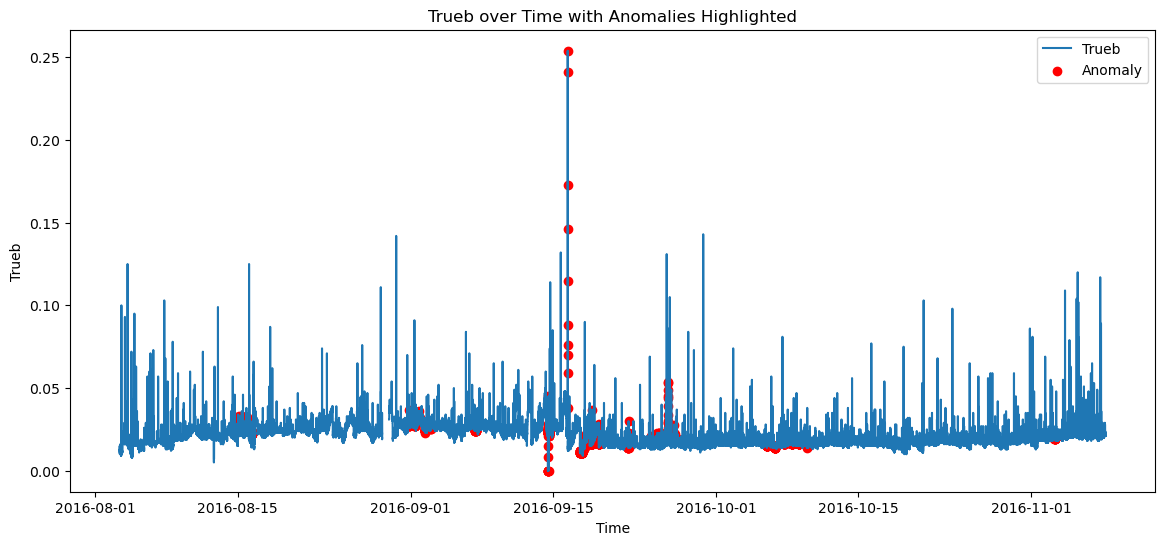

In [19]:
plt.figure(figsize=(14, 6))

plt.plot(df['Time'], df['Trueb'], label='Trueb')
plt.scatter(anomalies['Time'], anomalies['Trueb'], color='red', label='Anomaly')

plt.title('Trueb over Time with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('Trueb')
plt.legend()

plt.show()

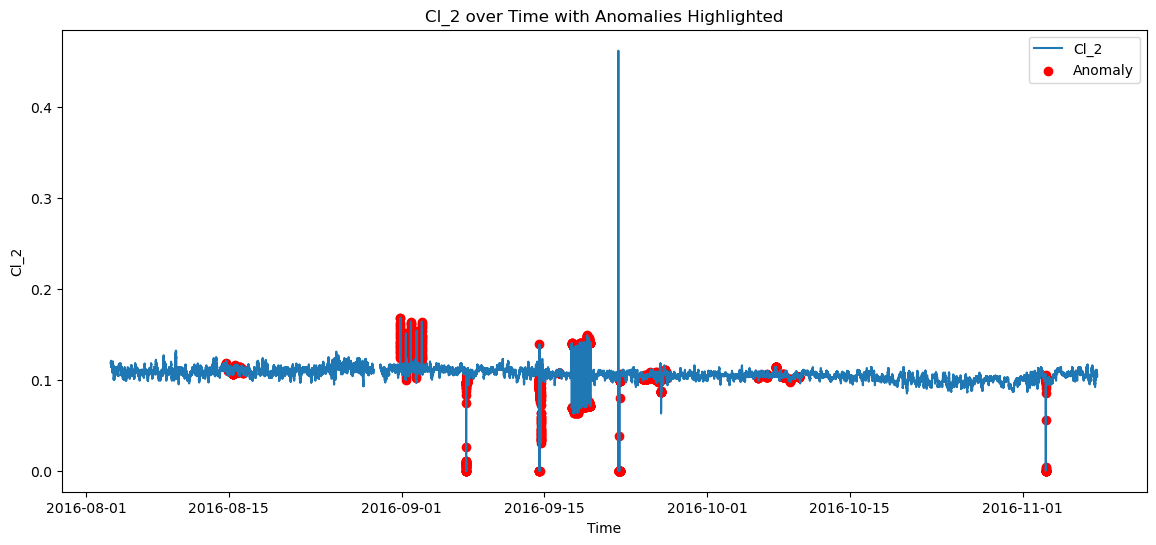

In [20]:
plt.figure(figsize=(14, 6))

plt.plot(df['Time'], df['Cl_2'], label='Cl_2')
plt.scatter(anomalies['Time'], anomalies['Cl_2'], color='red', label='Anomaly')

plt.title('Cl_2 over Time with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('Cl_2')
plt.legend()

plt.show()

Finally, we can plot the anomalies grouped by hours of occurence. We might found that anomalies are more likely to take place at a specific moment of time.

In [21]:
anomalies["Hour"] = anomalies["Time"].dt.hour
hours_per_day = list(range(24))

C:\Users\guyet\AppData\Local\Temp\ipykernel_37744\2299216029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies["Hour"] = anomalies["Time"].dt.hour


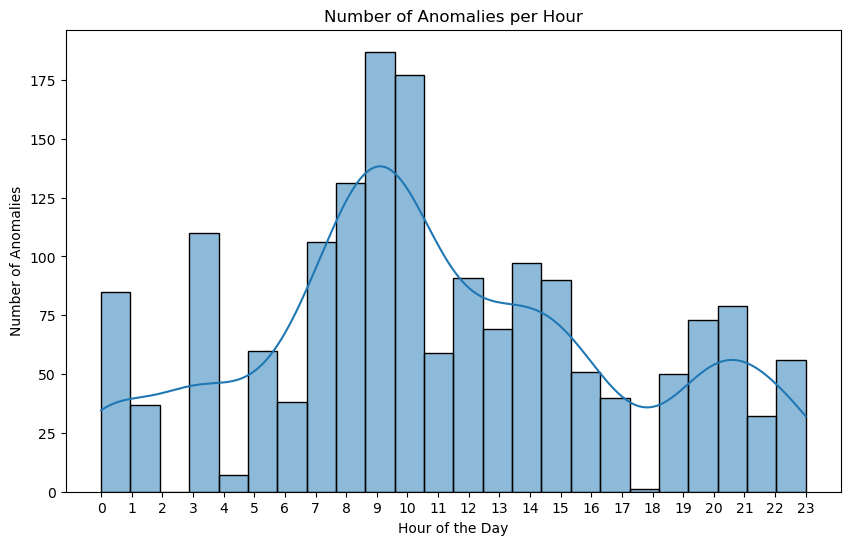

In [22]:
plt.figure(figsize=(10, 6))

sns.histplot(data=anomalies, x="Hour", kde=True, bins=24)

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Anomalies')
plt.xticks(hours_per_day)
plt.title('Number of Anomalies per Hour')

plt.show()

Finally, from this graph it looks like anomalies are almost evenly distributed, except between8 and 10 am where we have a pick of anomalies.

## Modeling

For detecting anomalies, the final choice for the model was to build a deep learning network with an LSTM at its core. The reason behind is a rather logical thought: as measurements are made on a timely basis, we can see them as sequences.

And just like a dot comes to the end of a sentence, by intuition we can suppose that anomalies are not coming from nowhere and previous variations in the measurements might indicate an anomaly to come.

For a full explanation of the methodology do not hesitate to have a look at the GitHub repository available [here](https://github.com/julienguyet/water_quality).

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import pandas as pd
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Preprocessing the Data

First, we will design a function to scale our data with a MinMax Scaler and save our scaler so we can reuse it in production.

In [24]:
def data_preprocessing(df: pd.DataFrame, folder: str) -> pd.DataFrame:
    """
    Preprocesses the input DataFrame by performing the following steps:
    1. Converts the 'Time' column to datetime format and sets it as the index.
    2. Drops specified columns ('Tp', 'Fm', 'Fm_2').
    3. Drops missing values.
    4. Normalizes the remaining data to a [0, 1] range using MinMaxScaler.
    5. Saves the fitted scaler object to the specified folder.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing the data to preprocess.
    - folder (str): Directory path to save the scaler.

    Returns:
    - pd.DataFrame: Preprocessed DataFrame with normalized values.
    """

    os.makedirs(folder, exist_ok=True)

    df['Time'] = pd.to_datetime(df['Time'])
    df.set_index('Time', inplace=True)
    df.sort_values(by=['Time'], ascending=True)

    df.drop(columns=['Tp', 'Fm', 'Fm_2'], inplace=True)
    df.dropna(inplace=True)

    scalers = {}

    for col in df.columns:
        scaler = MinMaxScaler()
        df[[col]] = scaler.fit_transform(df[[col]])
        scalers[col] = scaler

    for col, scaler in scalers.items():
        joblib.dump(scaler, os.path.join(folder, f"{col}_scaler.pkl"))

    return df


In [25]:
data_path = "../data/raw/waterDataTraining.csv"
df = pd.read_csv(data_path)
data = data_preprocessing(df=df, folder="../preprocessors/")

In [26]:
data.head()

,Cl,pH,Redox,Leit,Trueb,Cl_2,EVENT
Time,,,,,,,
2016-08-03 09:49:00+00:00,0.2125,0.883266,0.754622,0.326625,0.043307,0.255411,0.0
2016-08-03 09:50:00+00:00,0.2125,0.883266,0.754622,0.326625,0.043307,0.255411,0.0
2016-08-03 09:51:00+00:00,0.2125,0.881240,0.754622,0.326625,0.043307,0.253247,0.0
2016-08-03 09:52:00+00:00,0.2125,0.881240,0.754622,0.326625,0.043307,0.255411,0.0
2016-08-03 09:53:00+00:00,0.2125,0.881240,0.754622,0.326625,0.043307,0.255411,0.0


Now that our scaling is done, we have to create another function to generate sequences in our data.

In [27]:
def create_sequences(df: pd.DataFrame, sequence_length: int, label_column='EVENT') -> np.array:
    """
    Generates sequences of data and their corresponding labels for time series or sequential modeling.

    The function splits the input DataFrame into sequences of a specified length, where each sequence consists of the feature values over a defined window, and the label corresponds to the value of the 'EVENT' column immediately following the sequence.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing the data. Must include an 'EVENT' column.
    - sequence_length (int): Length of each sequence (number of consecutive rows).

    Returns:
    - tuple: A tuple containing:
    - np.array: A 3D NumPy array of shape (num_sequences, sequence_length, num_features), where `num_sequences` is the number of sequences, and `num_features` is the number of features (excluding 'EVENT').
    - np.array: A 1D NumPy array of labels, where each label corresponds to the 'EVENT' value after each sequence.
    """

    sequences = []
    labels = []

    for i in range(len(df) - sequence_length):
        sequences.append(df.iloc[i: i + sequence_length].drop(columns=[label_column]).values)
        labels.append(df.iloc[i + sequence_length][label_column])

    return np.array(sequences), np.array(labels)


In [28]:
sequence_length = 10
sequences, labels = create_sequences(df=data, sequence_length=sequence_length)

### Building the Model

First, let's build a "simple" architecture using two LSTM with 50 neurons each. To minimize overfitting risks, we will add some dropout for each layer.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=True),
    Dropout(0.5),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
def plot_training_history(history, num_epochs=10):
    """
    Plots the training and validation loss and accuracy over epochs
    from a Keras history object.

    Parameters:
    - history: A Keras History object containing training metrics.
    - num_epochs (int, optional): The total number of epochs to display on the x-axis.
    If None, it is inferred from the history object.
    """
    train_accuracy = history.history['accuracy']
    test_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']

    if num_epochs is None:
        num_epochs = len(train_accuracy)

    epochs = range(num_epochs)

    plt.figure(figsize=(12, 5))
    plt.plot(train_loss, label="Train Loss", lw=2)
    plt.plot(test_loss, label="Test Loss", lw=2)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.xticks(epochs)
    plt.xlim([0, num_epochs - 1])
    plt.legend(loc="upper right")
    plt.title("Loss Over Time for Neural Network Model")
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.plot(train_accuracy, label="Train Accuracy", lw=2)
    plt.plot(test_accuracy, label="Test Accuracy", lw=2)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.xticks(epochs)
    plt.xlim([0, num_epochs - 1])
    plt.ylim([0, 1])
    plt.legend(loc="upper right")
    plt.title("Accuracy Over Time for Neural Network Model")
    plt.grid()
    plt.show()

    print(f"Final Train Accuracy: {train_accuracy[-1]:.4f}")
    print(f"Final Test Accuracy: {test_accuracy[-1]:.4f}")


In [31]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2771/2771 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9781 - loss: 0.0948 - val_accuracy: 0.9903 - val_loss: 0.0553
Epoch 2/10
2771/2771 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9896 - loss: 0.0584 - val_accuracy: 0.9880 - val_loss: 0.0590
Epoch 3/10
2771/2771 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9884 - loss: 0.0613 - val_accuracy: 0.9907 - val_loss: 0.0486
Epoch 4/10
2771/2771 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9899 - loss: 0.0534 - val_accuracy: 0.9896 - val_loss: 0.0483
Epoch 5/10
2771/2771 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9896 - loss: 0.0512 - val_accuracy: 0.9908 - val_loss: 0.0407
Epoch 6/10
2771/2771 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9902 - loss: 0.0465 - val_accuracy: 0.9914 - val_loss: 0.0401
Epoch 7/10
2771/2771 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9903 - loss: 0.0450 - val_accuracy: 0.9924 - val_loss: 0.0372
Epoch 8/10
2771/2771 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9915 - loss: 0

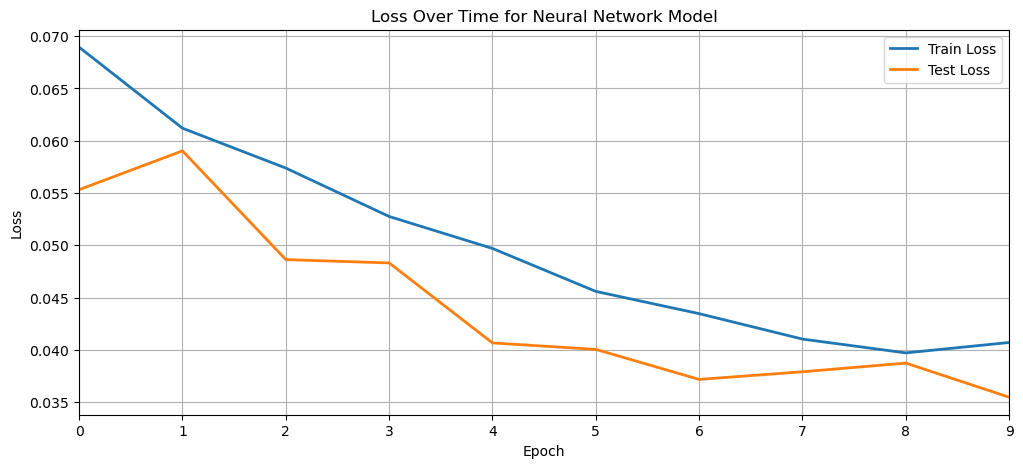

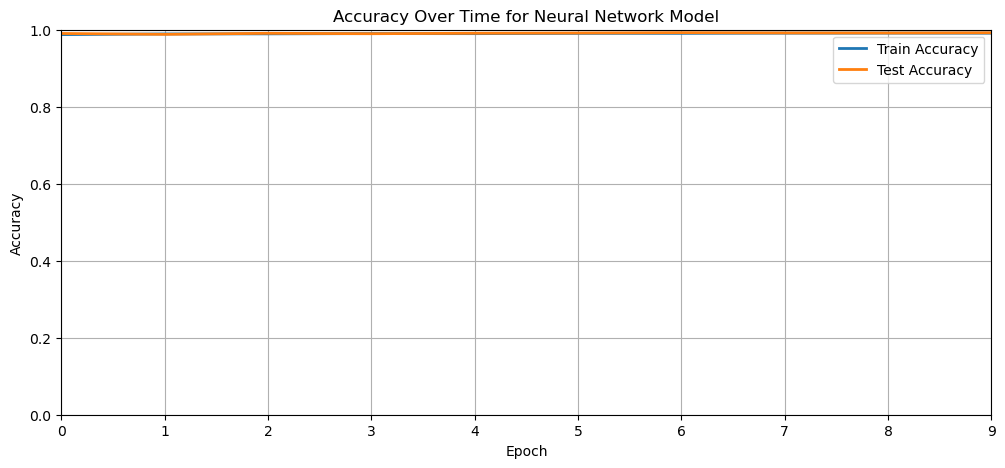

Final Train Accuracy: 0.9910
Final Test Accuracy: 0.9921


In [32]:
plot_training_history(history)

As we can see with these curves, the loss for the validation set (in orange) is higher than for the training (in blue) which suggests overfitting.

However, the accuraccy scores are very good. So good that this is suspicious. Before exploring other training options, let's investigate a bit more our predictions.

In [33]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Confusion Matrix:\n{cm}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


866/866 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix:
[[27340    35]
 [  195   133]]
Precision: 0.7917
Recall: 0.4055
F1-Score: 0.5363


As we can see, our confusion scores are pretty low, with only 51% in precision and 58% in recall. However recall is pretty important here as we want to make sure the tap water is drinkable (meaning catching anomalies).

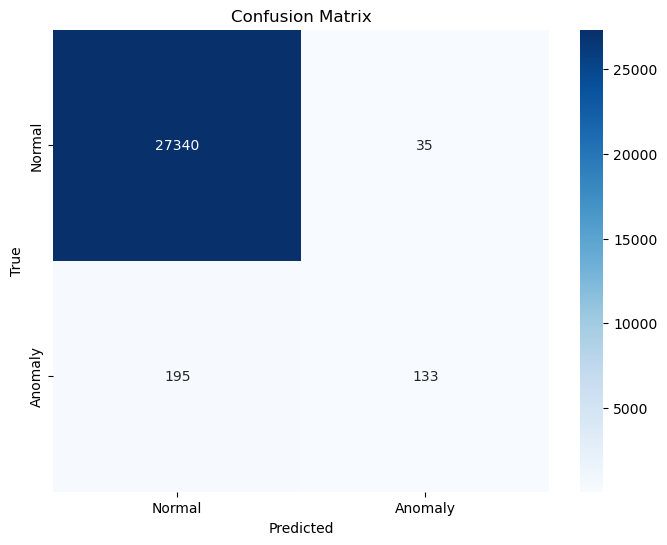

In [34]:
def plot_confusion_matrix(cm, class_names):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(cm, class_names=['Normal', 'Anomaly'])

Plotting the confusion matrix for the validation set helps us understand better the performance of our model.

Indeed, as we can see, the model is struggling to spot the anomalies. Almost half of the time, it is confusing anomalies with normal data point. This is even more obvious when we plot the predictions againt the real labels:

In [35]:
sequences_all, _ = create_sequences(df, sequence_length)
anomalies_all = (model.predict(sequences_all) > 0.5).astype("int32")

data['LSTM_Anomaly'] = False

data.iloc[sequence_length:, data.columns.get_loc('LSTM_Anomaly')] = anomalies_all.flatten()

4329/4329 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


C:\Users\guyet\AppData\Local\Temp\ipykernel_37744\2142117424.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data.iloc[sequence_length:, data.columns.get_loc('LSTM_Anomaly')] = anomalies_all.flatten()


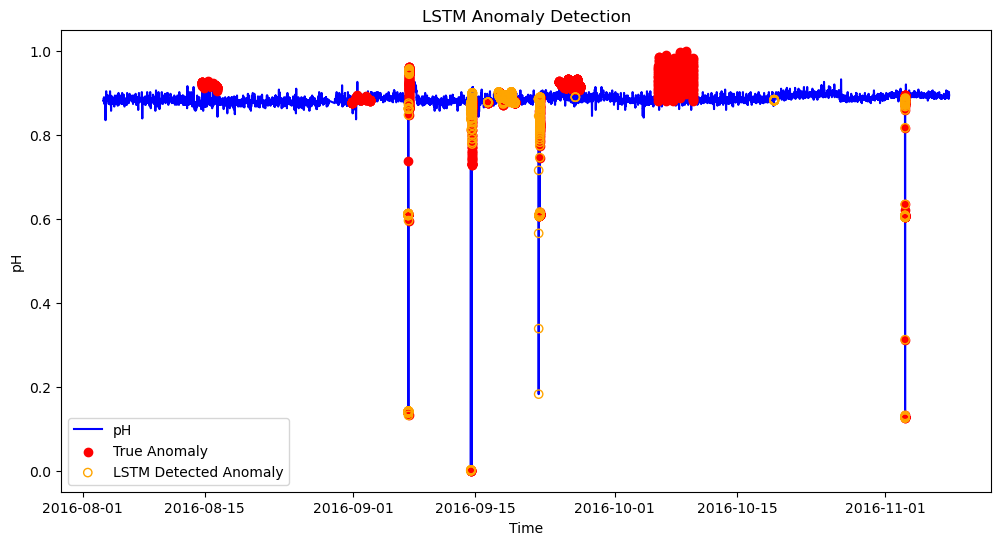

In [36]:
def plot_anomalies(df):
    df['EVENT'] = df['EVENT'].astype(bool)
    df['LSTM_Anomaly'] = df['LSTM_Anomaly'].astype(bool)

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['pH'], label='pH', color='blue')
    plt.scatter(df.index[df['EVENT']], df['pH'][df['EVENT']], color='red', label='True Anomaly', zorder=5)
    plt.scatter(df.index[df['LSTM_Anomaly']], df['pH'][df['LSTM_Anomaly']], facecolors='none', edgecolors='orange', label='LSTM Detected Anomaly', zorder=6)
    plt.legend()
    plt.title('LSTM Anomaly Detection')
    plt.xlabel('Time')
    plt.ylabel('pH')
    plt.show()

plot_anomalies(data)

As usual, a visualization helps to understand better. Here, it is obvious that the model will struggle to spot the anomalies which are mixed in the flow of the other normal data points.

So, how can we solve this problem?

### LSTM x SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
num_samples, seq_len, num_features = sequences.shape
sequences_reshaped = sequences.reshape((num_samples, seq_len * num_features))

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(sequences_reshaped, labels)

sequences_resampled = X_resampled.reshape((X_resampled.shape[0], seq_len, num_features))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(sequences_resampled, y_resampled, test_size=0.2, random_state=42)

In [40]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, X_train.shape[2]), return_sequences=True),
    Dropout(0.5),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True,verbose=1)

model.summary()

c:\Users\guyet\anaconda3\envs\deepl\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
5472/5472 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.7432 - loss: 0.5078 - val_accuracy: 0.8869 - val_loss: 0.3118
Epoch 2/10
5472/5472 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.8767 - loss: 0.3167 - val_accuracy: 0.8908 - val_loss: 0.2887
Epoch 3/10
5472/5472 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9048 - loss: 0.2630 - val_accuracy: 0.9080 - val_loss: 0.2399
Epoch 4/10
5472/5472 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9208 - loss: 0.2299 - val_accuracy: 0.9519 - val_loss: 0.1455
Epoch 5/10
5472/5472 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9396 - loss: 0.1913 - val_accuracy: 0.9429 - val_loss: 0.1807
Epoch 6/10
5472/5472 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9424 - loss: 0.1839 - val_accuracy: 0.9077 - val_loss: 0.2741
Epoch 7/10
5472/5472 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9464 - loss: 0.1735 - val_accuracy: 0.9625 - val_loss: 0.1241
Epoch 8/10
5472/5472 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9502 - loss: 0

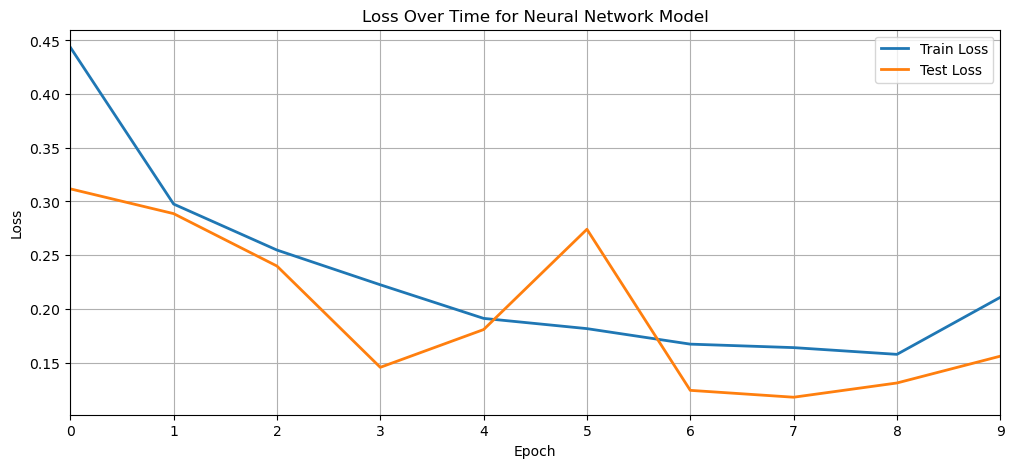

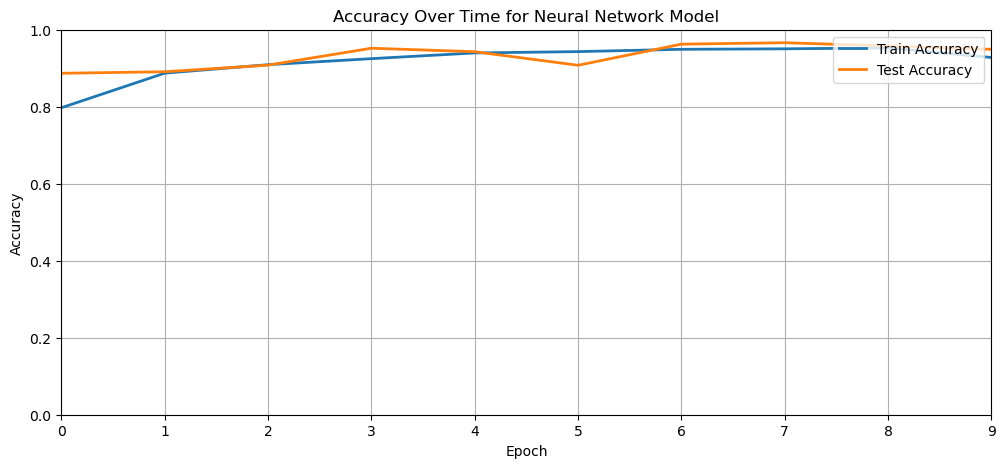

Final Train Accuracy: 0.9278
Final Test Accuracy: 0.9491


In [47]:
plot_training_history(history, num_epochs=10)

After plotting losses and accuracies, we already observe much better results.

In [43]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Confusion Matrix:\n{cm}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

1710/1710 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Confusion Matrix:
[[26708   453]
 [ 2473 25080]]
Precision: 0.9823
Recall: 0.9102
F1-Score: 0.9449


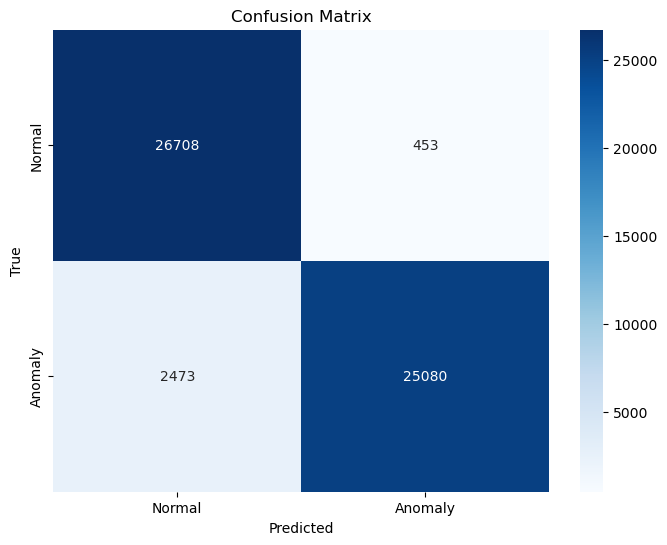

In [44]:
plot_confusion_matrix(cm, class_names=['Normal', 'Anomaly'])

This time we observe excellent scores on our 3 metrics. Of course, the model is still making some mistakes and we could seek improvement, but we can be confident our solution has worked and that our model will perform well in production.

Finally, we can save our model so we can use it later in production.

In [45]:
def save_model(model, folder, model_name='LSTM.h5'):

  os.makedirs(folder, exist_ok=True)
  model_path = os.path.join(folder, model_name)
  model.save(model_path)

  print(f"Model saved successfully at {model_path}")

In [48]:
save_model(model=model, folder="../models/")

Model saved successfully at ../models/LSTM.h5
